# Overview

In this project, we will be examining a very simple data set which contains 25,000 samples and 3 columns. With this data, we will attempt to predict the height or weight of an individual.

Data Source: http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html

According to the source, the data was simulated based on a 1993 Growth Survey of 25,000 children from birth to 18 years of age recruited from Maternal and Children Health Centres.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams.update({'figure.figsize':(8,8)})
sns.set_style('darkgrid')

In [3]:
train = pd.read_csv('C:/JupyterP/Learning/Data/Practice/heightweight.csv')

In [4]:
train.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21835 entries, 0 to 21834
Data columns (total 3 columns):
Index             21835 non-null int64
Height(Inches)    21835 non-null float64
Weight(Pounds)    21835 non-null float64
dtypes: float64(2), int64(1)
memory usage: 511.8 KB


In [6]:
train.describe()

,Index,Height(Inches),Weight(Pounds)
count,21835.0000,21835.000000,21835.000000
mean,10918.0000,67.987450,127.088942
std,6303.3659,1.899562,11.669211
min,1.0000,60.278360,78.567850
25%,5459.5000,66.694785,119.316100
50%,10918.0000,67.988260,127.192000
75%,16376.5000,69.266715,134.880300
max,21835.0000,75.152800,170.924000


In [7]:
train.rename(columns={
    'Height(Inches)':'height(in)',
    'Weight(Pounds)':'weight(lbs)'
},inplace=True)
train.head(1)

,Index,height(in),weight(lbs)
0,1,65.78331,112.9925


In [8]:
print('Mean height:{0: .2f} inches.'.format(np.mean(train['height(in)'])))
print('Mean weight:{0: .2f} pounds.'.format(np.mean(train['weight(lbs)'])))

Mean height: 67.99 inches.
Mean weight: 127.09 pounds.


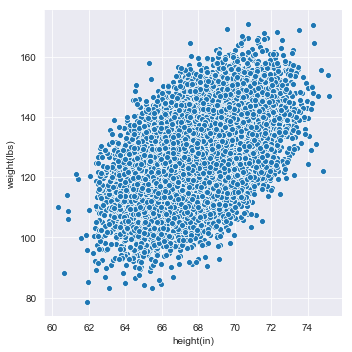

In [9]:
sns.relplot(data=train, x='height(in)', y='weight(lbs)');

C:\Users\Paolo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


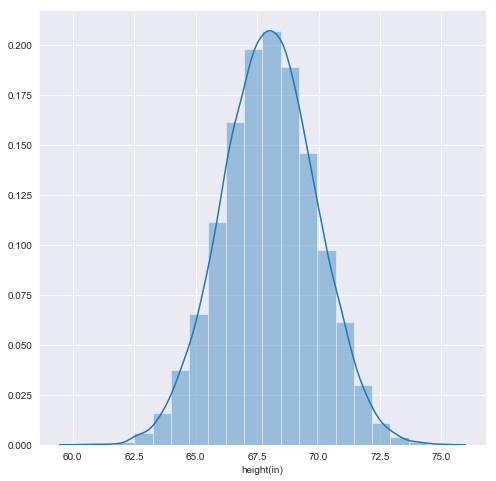

In [10]:
sns.distplot(train['height(in)'], bins=20);

C:\Users\Paolo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


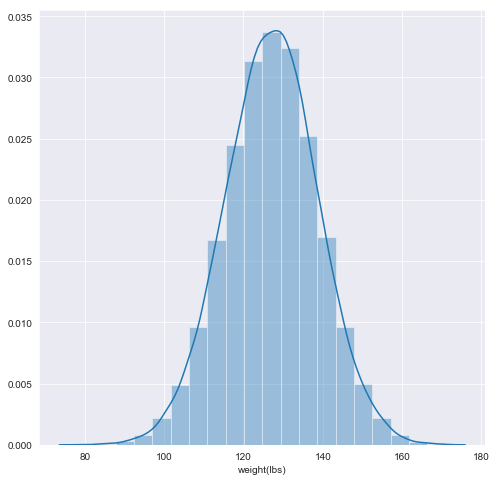

In [11]:
sns.distplot(train['weight(lbs)'], bins=20);

From the above, we can see that height and weight are both normally distributed in the data. Also, we can see there is potentially a very strong linear relationship between these two variables. 

We can probably utilize a simple linear regression model to predict weight using height and height using weight with this data set.

# Model Building

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
from sklearn import metrics
from sklearn import model_selection

def modelfit(alg, dtrainX, dtrainY, dtestX, dtestY):
    # Fit the algorithm on the data:
    alg.fit(dtrainX, dtrainY)
    
    # Predict training set:
    dtrain_predictions = alg.predict(dtrainX)
    
    # Perform cross-validation:
    kfold = model_selection.KFold(n_splits=10, random_state=0)
    cv_score = model_selection.cross_val_score(alg, dtrainX, dtrainY, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    # Print Model Report:
    print('\nModel Report:\nRMSE: {0:.6g}'.format(np.sqrt(mean_squared_error(dtrainY.values, dtrain_predictions))))
    print('CV Score: Mean: {0:.6g} | Std: {1:.6g} | Min: {2:.6g} | Max: {3:.6g}'.format(np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    # Predict on testing data:
    dtestY = alg.predict(dtestX)

### Predicting Height

In [14]:
X = train[['weight(lbs)']]
Y = train[['height(in)']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

In [15]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
preds = lr.predict(X_test)
print('RMSE: {0: .4f}'.format(np.sqrt(mean_squared_error(Y_test, preds))))

RMSE:  1.6705


In [16]:
modelfit(lr, X_train, Y_train, X_test, Y_test)
print('Beta Coefficient: {}'.format(lr.coef_))


Model Report:
RMSE: 1.6357
CV Score: Mean: 1.63577 | Std: 0.0157946 | Min: 1.61264 | Max: 1.65781
Beta Coefficient: [[0.0823391]]


This tells us that weight is a pretty good predictor for determining the weight of an individual.

Interpretation of beta coefficient: For every pound heavier an individual is, their height will increase by .08 inches on average.

### Predicting Weight

In [17]:
X = train[['height(in)']]
Y = train[['weight(lbs)']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

In [18]:
lr = LinearRegression()

lr.fit(X_train, Y_train)
preds = lr.predict(X_test)
print('RMSE: {0: .4f}'.format(np.sqrt(mean_squared_error(Y_test, preds))))

RMSE:  10.3451


In [19]:
modelfit(lr, X_train, Y_train, X_test, Y_test)
print('Beta Coefficient: {}'.format(lr.coef_))


Model Report:
RMSE: 10.0268
CV Score: Mean: 10.0277 | Std: 0.120327 | Min: 9.8089 | Max: 10.2276
Beta Coefficient: [[3.0939924]]


This tells us that height is a good predictor for weight as well.

Interpretation of beta coefficient: For every inch taller an individual is, their weight will increase by 3.09 pounds on average.

# Closing

In this project, we learned how to do very basic single-variable linear regression. We also saw how to prepare our data for model building and testing, as well as finding coefficients of predictors and how to do a basic interpretation of those coefficients.